# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**
*Special Exception for this Lab-03. You can use cv2.LUT()


In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Image Size is (667, 1000)


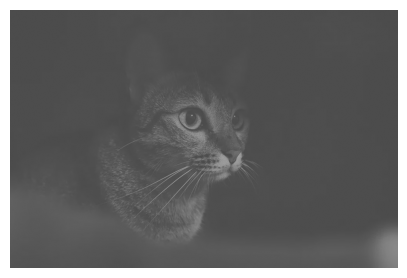

In [2]:
img = cv.imread('./cat-in-low-dark-gray.jpg',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img.shape))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

Image Size is (667, 1000)


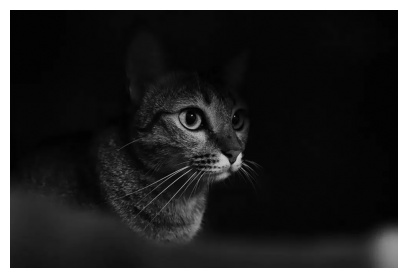

In [3]:
img_GT = cv.imread('./cat-in-dark-gray.jpg',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img_GT.shape))
plt.figure(figsize=(5,5))
plt.imshow(img_GT, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [4]:
img.dtype

dtype('uint8')

#Q1) a)Implement following function in Image "Linear_Contrast_stretching_plot.png" for Contrast Enhancement. Name this function as $lin\_stretch(img, params)$ [3 Marks]
Here $params = [r1,s1,r2,s2]$. Kindly tune the params to get better result.

In [5]:
def lin_stretch(img, params):
    r1, s1, r2, s2 = params
    l = 255  # Assuming the maximum pixel value is 255

    # Create a lookup table (LUT)
    lut = np.zeros(256, dtype=np.uint8)
    for r in range(256):
        if r < r1:
            s = r / 2
        elif r >= r2 :
            s = l-(l - r)/2
        else:
            # Linear interpolation between the two critical points
            s = s1 + (r - r1) * (s2 - s1) / (r2 - r1)
        lut[r] = int(np.clip(s, 0, 255)) # Ensure the output is within 0-255 range

    # Apply the LUT to the image
    stretched_img = cv.LUT(img, lut)
    return stretched_img

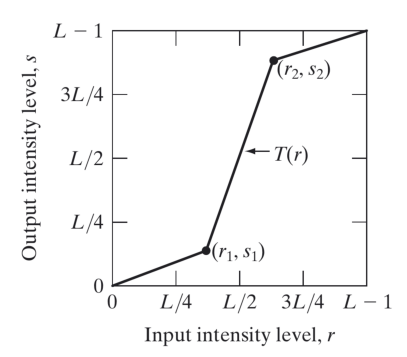

In [6]:
stretch_plot = cv.imread('./Linear_Contrast_stretching_plot.png')
plt.figure(figsize=(5,5))
plt.imshow(stretch_plot)
plt.axis('off')
plt.show()

#Q1) b) Apply $lin\_stretch$ function on $img$ and calculate its root mean squared error (RMSE) with $img\_GT$ [2 Marks]

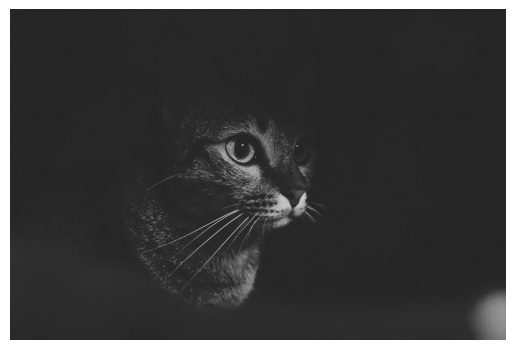

In [7]:
r1 = int(3 * 255 / 8)
r2 = 255-r1
s1 = r1 / 2
s2 = 255 - (255 - r2)/2
params = [r1, s1, r2, s2]
enhanced_img = lin_stretch(img, params)

plt.imshow(enhanced_img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [8]:
def rmse(img1, img2):
    """
    Calculates the Root Mean Squared Error (RMSE) between two images.

    Args:
        img1: The first image (numpy array).
        img2: The second image (numpy array).

    Returns:
        The RMSE value between the two images.
    """
    return np.sqrt(np.mean((img1 - img2)**2))

In [9]:
# xarr=[]
# yarr=[]
# zarr=[]
# min_rmse = 1000
# min_r1factor = 0
# min_s1factor = 0
# min_r2factor = 0
# min_s2factor = 0
# precision = 10
# print("r1    s1    r2    s2    rmse")
# for i in range(0,precision):
#   for j in range(0,precision):
#     for k in range(0,precision):
#       for l in range(0,precision):
#         r1factor = i/precision
#         s1factor = j/precision
#         r2factor = k/precision
#         s2factor = l/precision
#         r1 = int(r1factor * 255)
#         r2 = int(r2factor * 255)
#         s1 = int(s1factor * 255)
#         s2 = int(s2factor * 255)
#         if r1 > r2:
#           continue
#         if s1 > s2:
#           continue
#         params = [r1, s1, r2, s2]
#         enhanced_img = lin_stretch(img, params)
#         rmse_val = rmse(enhanced_img, img_GT)
#         if rmse_val < 5:  print(f"{str(r1).ljust(6)}{str(s1).ljust(6)}{str(r2).ljust(6)}{str(s2).ljust(6)}{str(rmse_val).ljust(6)}")
#         xarr.append(r1)
#         yarr.append(s1)
#         zarr.append(rmse_val)
#         if rmse_val < min_rmse:
#           min_rmse = rmse_val
#           min_r1factor = r1factor
#           min_s1factor = s1factor
#           min_r2factor = r2factor
#           min_s2factor = s2factor
# print(f"min_rmse: {min_rmse} min_r1factor: {min_r1factor} min_s1factor : {min_s1factor} min")


# r1 = int(min_r1factor * 255)
# r2 = int(min_r2factor * 255)
# s1 = int(min_s1factor * 255)
# s2 = int(min_s2factor * 255)
# params = [r1, s1, r2, s2]
# enhanced_img = lin_stretch(img, params)
# plt.imshow(enhanced_img, cmap='gray',vmin=0, vmax=255)
# plt.axis('off')
# plt.show()

r1    s1    r2    s2    rmse


73    0     182   255   3.975396409377831
73    0     182   255   3.975396409377831
73    1     182   254   4.573127294682854
74    0     181   255   2.4008862681442698
74    0     181   255   2.4008862681442698
74    1     181   254   3.0087072540095745
74    2     181   253   3.729760574491141
74    3     181   252   4.243478990525166
75    0     180   255   2.1919472356008414
75    0     180   255   2.1919472356008414
75    1     180   254   2.0426395452561077
75    2     180   253   2.260790218882129
75    3     180   252   2.763167467377541
75    4     180   251   3.4403679939845073
75    5     180   250   4.248474812316128
75    6     180   249   4.834206111207628
76    0     179   255   3.5452311868079973
76    0     179   255   3.5452311868079973
76    1     179   254   2.8459879964894297
76    2     179   253   2.3017006944771343
76    3     179   252   2.0323201857314053
76    4     179   251   2.1314778678300828
76    5     179   250   2.5831828396782903
76    6     179   24

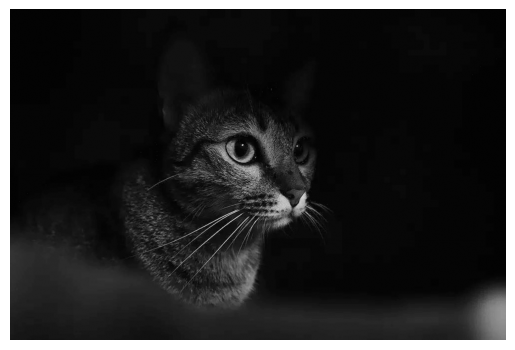

In [10]:
xarr=[]
yarr=[]
zarr=[]
min_rmse = 1000
min_r1 = 0
min_s1 = 0
min_r2 = 0
min_s2 = 0
precision = 128
print("r1    s1    r2    s2    rmse")
for i in range(0,precision):
  for j in range(0,precision):
    r1factor = i/precision
    s1factor = j/precision
    r1 = int(r1factor * 127)
    r2 = 255 - r1
    s1 = int(s1factor * 127)
    s2 = 255 - s1
    if r1 > r2:
        continue
    if s1 > s2:
        continue
    params = [r1, s1, r2, s2]
    enhanced_img = lin_stretch(img, params)
    rmse_val = rmse(enhanced_img, img_GT)
    if rmse_val < 5:  print(f"{str(r1).ljust(6)}{str(s1).ljust(6)}{str(r2).ljust(6)}{str(s2).ljust(6)}{str(rmse_val).ljust(6)}")
    xarr.append(r1)
    yarr.append(s1)
    zarr.append(rmse_val)
    if rmse_val < min_rmse:
        min_rmse = rmse_val
        min_r1 = r1
        min_s1 = s1
        min_r2 = r2
        min_s2 = s2
print(f"min_rmse: {min_rmse}\nmin_r1: {min_r1}\nmin_s1 : {min_s1} \nmin_r2 : {min_r2} \nmin_s2 : {min_s2}")


params = [min_r1, min_s1, min_r2, min_s2]
enhanced_img = lin_stretch(img, params)
plt.imshow(enhanced_img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

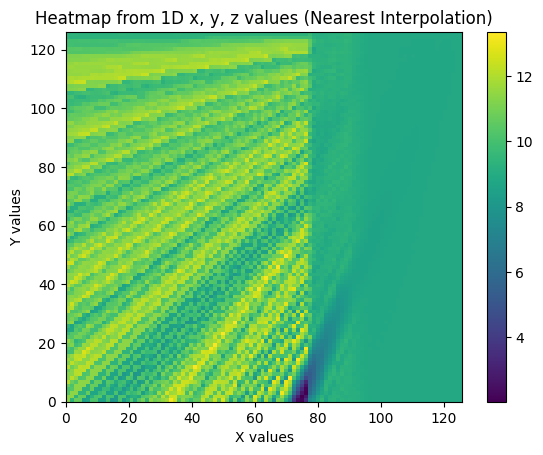

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Example 1D arrays of x, y, z values
x = np.array(xarr)
y = np.array(yarr)
z = np.array(zarr)

# Create a grid of x and y values where we want to interpolate the z values
grid_x, grid_y = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate the z values onto the grid using nearest interpolation (no smoothing)
grid_z = griddata((x, y), z, (grid_x, grid_y), method='nearest')

# Plot the heatmap
plt.imshow(grid_z, extent=(min(x), max(x), min(y), max(y)), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar()  # Add color bar to show the scale
plt.title('Heatmap from 1D x, y, z values (Nearest Interpolation)')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()


Size of image is (828, 1621)
Minimum and Maximum intensity value in image is (21,255)


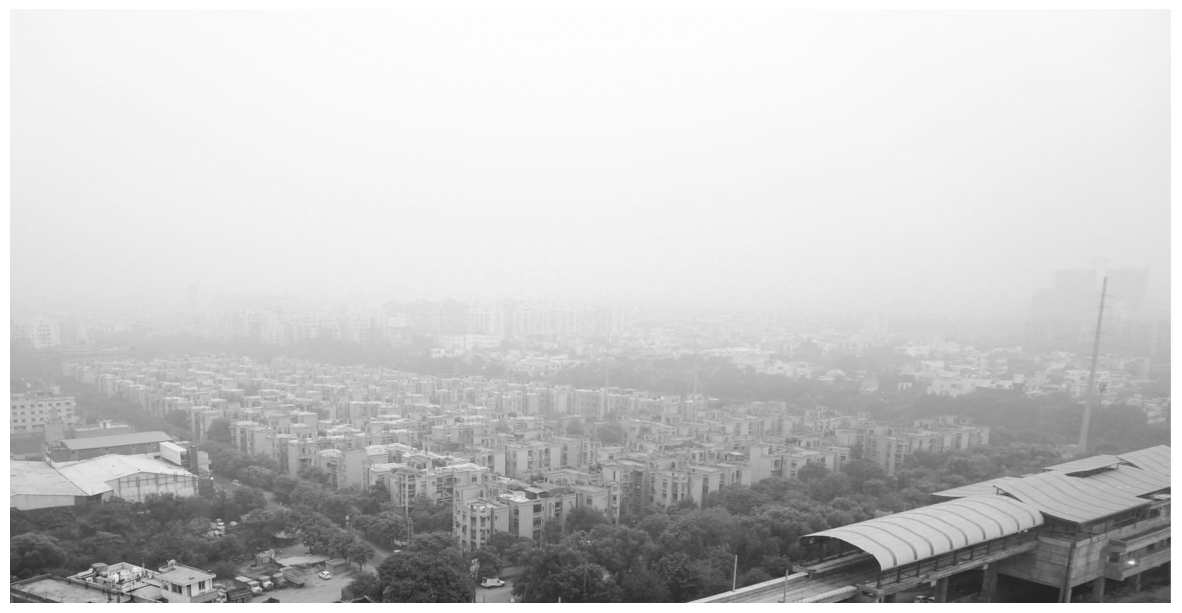

In [12]:
img2 = cv.imread('./foggy_noida01_gray.jpg', cv.IMREAD_GRAYSCALE)
print('Size of image is {}'.format(img2.shape))
print('Minimum and Maximum intensity value in image is ({},{})'.format(np.min(img2) ,np.max(img2)))
plt.figure(figsize=(15,15))
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Size of image is (828, 1621)
Minimum and Maximum intensity value in image is (0,255)


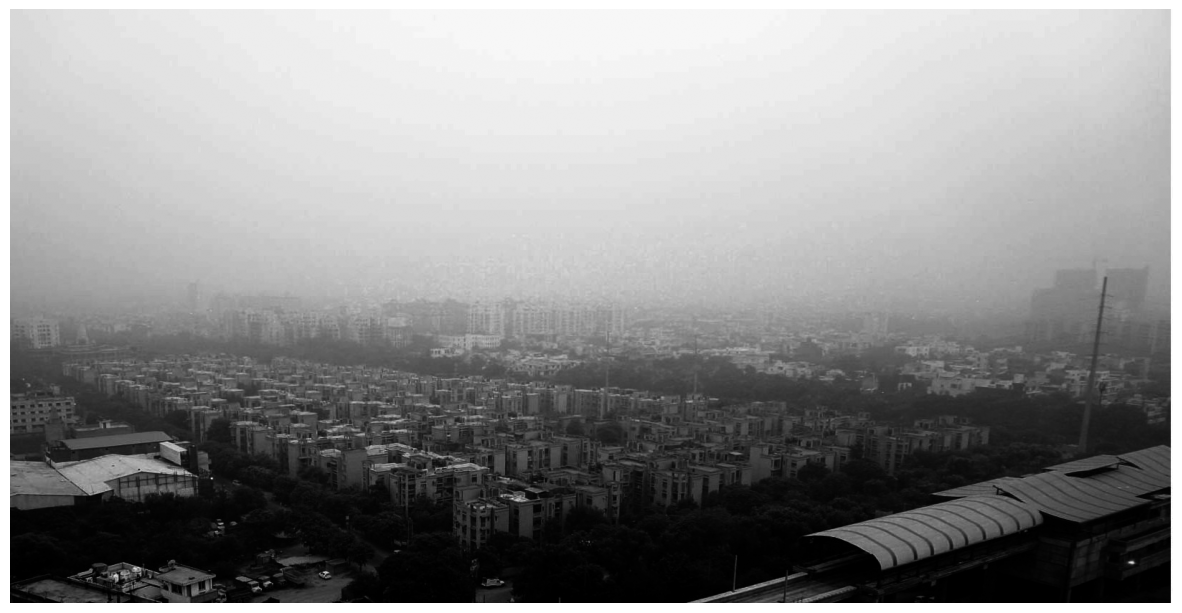

In [13]:
img2_GT = cv.imread('./foggy_noida01_gray_GT.jpg', cv.IMREAD_GRAYSCALE)
print('Size of image is {}'.format(img2_GT.shape))
print('Minimum and Maximum intensity value in image is ({},{})'.format(np.min(img2_GT) ,np.max(img2_GT)))
plt.figure(figsize=(15,15))
plt.imshow(img2_GT, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#Q2) a) Implement Power-law (Gamma) Transformations $s = c.(\frac{r}{d})^{\gamma}$ as function $gamma\_corr(img2, gamma)$ [4 Marks]
Tune $gamma \in [1,5]$ to get better result.

In [14]:
def gamma_corr(img2, gamma):
    # Normalize the image to the range [0, 1]
    img2_normalized = img2 / 255.0

    # Apply the gamma correction formula
    corrected_img = np.power(img2_normalized, gamma)

    # Scale the image back to the range [0, 255] and convert to uint8
    corrected_img = (corrected_img * 255).astype(np.uint8)

    return corrected_img

#Q2) b) Apply $gamma\_corr$ function on $img2$ and calculate its root mean squared error (RMSE) with $img2\_GT$ [1 Marks]

Gamma: 1.00, RMSE: 10.604491653526418
Gamma: 1.01, RMSE: 10.996677988340794
Gamma: 1.02, RMSE: 10.763828153271314
Gamma: 1.03, RMSE: 10.654537400119947
Gamma: 1.04, RMSE: 10.704615955785854
Gamma: 1.05, RMSE: 10.833166073574853
Gamma: 1.06, RMSE: 10.967931219392991
Gamma: 1.07, RMSE: 11.13539022595387
Gamma: 1.08, RMSE: 11.01910855185138
Gamma: 1.09, RMSE: 11.079112092172778
Gamma: 1.10, RMSE: 10.97675348287665
Gamma: 1.11, RMSE: 10.785749226275515
Gamma: 1.12, RMSE: 10.558596839716328
Gamma: 1.13, RMSE: 10.339511225156473
Gamma: 1.14, RMSE: 10.337657708332802
Gamma: 1.15, RMSE: 10.679047172190621
Gamma: 1.16, RMSE: 10.70149862934064
Gamma: 1.17, RMSE: 10.726429169412059
Gamma: 1.18, RMSE: 10.869558844213696
Gamma: 1.19, RMSE: 10.540564590851975
Gamma: 1.20, RMSE: 10.630958353942042
Gamma: 1.21, RMSE: 10.760823182237045
Gamma: 1.22, RMSE: 10.898164136794316
Gamma: 1.23, RMSE: 10.76014965372651
Gamma: 1.24, RMSE: 10.737295427319943
Gamma: 1.25, RMSE: 10.520022916871383
Gamma: 1.26, RMSE

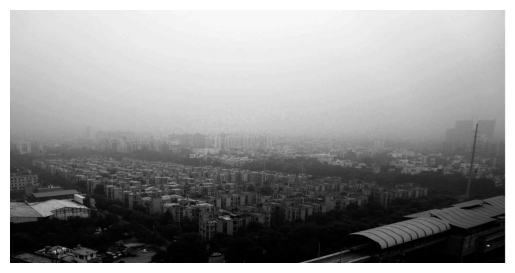

In [27]:
min_rmse = 1000
best_gamma = 0
for gamma in np.linspace(1, 5, 401):
    corrected_img2 = gamma_corr(img2, gamma)
    rmse_val = rmse(corrected_img2, img2_GT)
    print(f"Gamma: {gamma:.2f}, RMSE: {rmse_val}")
    if rmse_val < min_rmse:
        min_rmse = rmse_val
        best_gamma = gamma

print(f"Best Gamma: {best_gamma:.2f}, Minimum RMSE: {min_rmse}")

# Apply gamma correction with the best gamma value
corrected_img2 = gamma_corr(img2, best_gamma)
plt.imshow(corrected_img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()